# DAMASK tutorial
- creating necessary inputs for damask
- runing the damask jobs

here more option is given to the user to select from damask python package itself.

## Importing libraries and creatign Project

In [1]:
from pyiron_continuum import Project
from damask import Rotation

In [2]:
pr = Project("damask_proj")

In [3]:
pr.remove_jobs(silently=True) # remove the old or existing folder

  0%|          | 0/1 [00:00<?, ?it/s]

## Creating the Damask job

In [4]:
job = pr.create.job.DAMASK("damask_job")

## Creating the necessary inputs

In [5]:
grains=8;grids=16 # defines the number of grains and grids

### Homogenization

In [6]:
homogenization = pr.create.DAMASK.homogenization(method='SX', 
                                                 parameters={'N_constituents': 1,
                                                             "mechanical": {"type": "pass"}})

In [7]:
homogenization = pr.continuum.damask.Homogenization(method='SX', 
                                                     parameters={'N_constituents': 1,
                                                                 "mechanical": {"type": "pass"}})

### Elasticity

In [8]:
elasticity = pr.continuum.damask.Elasticity(type= 'Hooke', C_11= 106.75e9,
                                   C_12= 60.41e9, C_44=28.34e9)

### Plasticity

In [9]:
plasticity = pr.continuum.damask.Plasticity(type='phenopowerlaw',
                                            N_sl=[12],a_sl=[2.25],
                                            atol_xi=1.0,dot_gamma_0_sl=[0.001],
                                            h_0_sl_sl=[75.0e6],
                                            h_sl_sl=[1, 1, 1.4, 1.4, 1.4, 1.4, 1.4],
                                            n_sl=[20],
                                            output=['xi_sl'],
                                            xi_0_sl=[31.0e6],
                                            xi_inf_sl=[63.0e6]
                                           )  

### Phase

In [10]:
phase = pr.continuum.damask.Phase(composition='Aluminum', lattice= 'cF',
                         output_list=['F', 'P', 'F_e', 'F_p', 'L_p', 'O'],
                         elasticity=elasticity, plasticity=plasticity)

### Rotation

In [11]:
rotation = pr.continuum.damask.Rotation(Rotation.from_random, grains)

### Material

In [12]:
material = pr.continuum.damask.Material([rotation],['Aluminum'], phase, homogenization)

In [13]:
job.material = material

### Grid

In [14]:
grid = pr.continuum.damask.Grid.via_voronoi_tessellation(box_size=1.0e-5, grid_dim=grids, num_grains=grains)

In [15]:
job.grid = grid

### Loading

In [16]:
load_step =[{'mech_bc_dict':{'dot_F':[1e-3,0,0, 0,'x',0,  0,0,'x'],
                            'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 10.,'N': 40},
            'additional': {'f_out': 4}
           },{'mech_bc_dict':{'dot_F':[1e-3,0,0, 0,'x',0,  0,0,'x'],
                              'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 60.,'N': 60},
            'additional': {'f_out': 4}
           }]

In [17]:
solver = job.list_solvers()[0]

In [18]:
job.loading = pr.continuum.damask.Loading(solver=solver, load_steps=load_step)

## Runing the job

In [19]:
job.run()

The job damask_job was saved and received the ID: 2


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


In [20]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,2,finished,None,damask_job,/damask_job,None,/home/by/Projects/GitHub/pyiron_continuum/notebooks/damask_proj/,2024-01-15 18:43:27.541207,2024-01-15 18:43:43.707503,16.0,pyiron@by#1,DAMASK,0.4,None,None


## Post-processing

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varepsilon_z$$_z$', ylabel='$\\sigma_z$$_z$(Pa)'>)

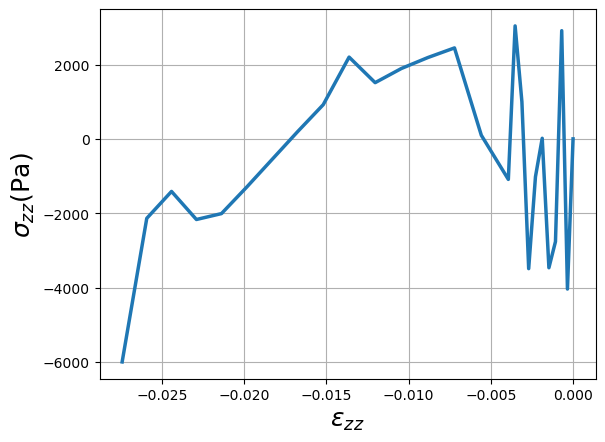

In [21]:
job.plot_stress_strain(component='zz')

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varepsilon_{vM}$', ylabel='$\\sigma_{vM}$ (Pa)'>)

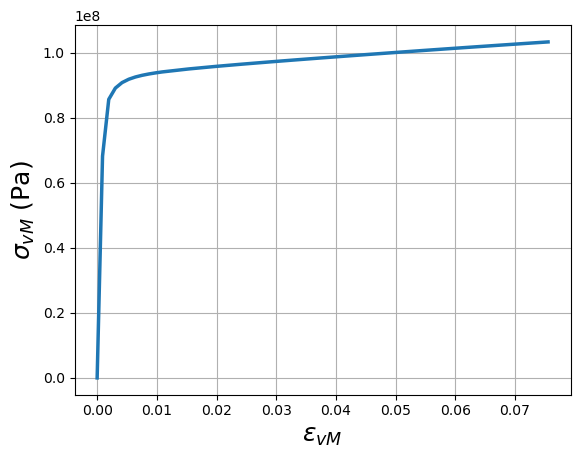

In [22]:
job.plot_stress_strain(von_mises=True)

In [23]:
job.output.damask.view(increments=80)

Created by DAMASK_grid v3.0.0-alpha8
        on 2024-01-15 18:43:27+0100
 executing "DAMASK_grid -l loading.yaml -g damask.vti -m material.yaml"

increment_80 (50.0 s)
  phase
    Aluminum
      mechanical
        F / 1: deformation gradient
        F_e / 1: elastic deformation gradient
        F_p / 1: plastic deformation gradient
        L_p / 1/s: plastic velocity gradient
        O / 1: crystal orientation as quaternion q_0 (q_1 q_2 q_3)
        P / Pa: first Piola-Kirchhoff stress
        epsilon_V^0.0(F) / 1: Seth-Hill strain tensor of order 0.0 based on left stretch tensor of F (deformation gradient)
        epsilon_V^0.0(F)_vM / 1: Mises equivalent strain of epsilon_V^0.0(F) (Seth-Hill strain tensor of order 0.0 based on left stretch tensor of F (deformation gradient))
        sigma / Pa: Cauchy stress calculated from P (first Piola-Kirchhoff stress) and F (deformation gradient)
        sigma_vM / Pa: Mises equivalent stress of sigma (Cauchy stress calculated from P (first Piol

In [24]:
job.output.stress

array([[[-9.75265814e-06,  3.08811329e-07, -8.32676313e-07],
        [ 3.08811329e-07, -1.14972566e-05, -1.34753488e-06],
        [-8.32676313e-07, -1.34753488e-06, -9.44044805e-06]],

       [[ 6.80341283e+07,  1.51340537e+05,  2.81902514e+05],
        [ 1.51340537e+05, -4.34770193e+03, -1.44665562e+06],
        [ 2.81902514e+05, -1.44665562e+06, -4.04107421e+03]],

       [[ 8.32467408e+07, -1.50511779e+06,  8.95184565e+05],
        [-1.50511779e+06,  5.78278371e+03, -6.18341533e+06],
        [ 8.95184565e+05, -6.18341533e+06,  2.91135547e+03]],

       [[ 8.50006247e+07, -1.89125030e+06,  1.30747797e+06],
        [-1.89125030e+06, -2.86310679e+03, -7.29155388e+06],
        [ 1.30747797e+06, -7.29155388e+06, -2.76412787e+03]],

       [[ 8.56505678e+07, -1.85037562e+06,  1.56665560e+06],
        [-1.85037562e+06, -1.62294059e+02, -7.73265129e+06],
        [ 1.56665560e+06, -7.73265129e+06, -3.46856691e+03]],

       [[ 8.60200100e+07, -1.74854864e+06,  1.73884834e+06],
        [-1.74